In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/banana_quality.csv')
df


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [38]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [39]:
df.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


<ipython-input-40-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

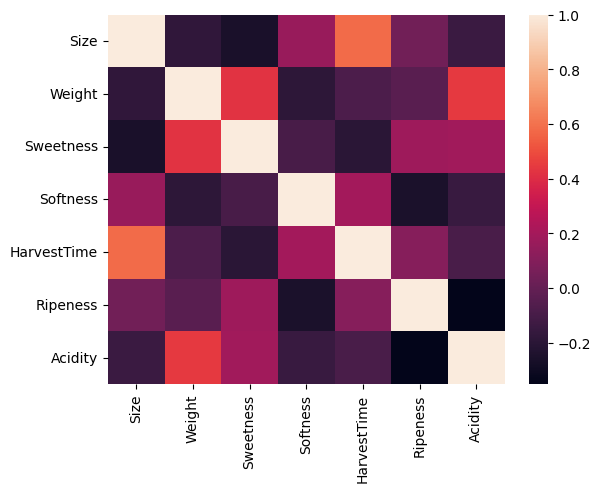

In [40]:
sns.heatmap(df.corr())

In [41]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [42]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [43]:
x=df.iloc[:,:-1].values
x

array([[-1.9249682 ,  0.46807805,  3.0778325 , ...,  0.2947986 ,
         2.4355695 ,  0.27129033],
       [-2.4097514 ,  0.48686993,  0.34692144, ..., -0.8922133 ,
         2.0675488 ,  0.30732512],
       [-0.3576066 ,  1.4831762 ,  1.5684522 , ..., -0.64726734,
         3.0906434 ,  1.427322  ],
       ...,
       [ 1.4227225 , -1.9076649 , -2.532364  , ..., -0.5623754 ,
        -1.8347653 ,  0.6973611 ],
       [-2.131904  , -2.7425997 , -1.0080286 , ..., -0.80263203,
        -3.5802662 ,  0.4235689 ],
       [-2.6608794 , -2.0446665 ,  0.15902641, ..., -1.5818563 ,
        -1.6058589 ,  1.4356443 ]])

In [44]:
y=df.iloc[:,-1].values
y

array(['Good', 'Good', 'Good', ..., 'Bad', 'Bad', 'Bad'], dtype=object)

<Axes: xlabel='Quality', ylabel='count'>

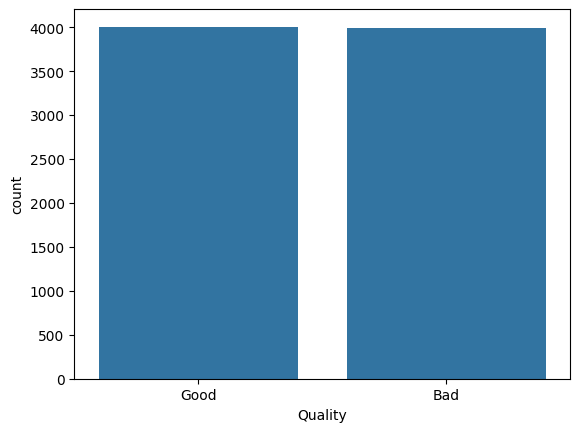

In [45]:
sns.countplot(x='Quality',data=df)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
y_train

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Bad'], dtype=object)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train


array([[0.4554691 , 0.54164785, 0.30039324, ..., 0.4520787 , 0.66287484,
        0.39879776],
       [0.32337457, 0.7028194 , 0.48259899, ..., 0.28391714, 0.38872008,
        0.41659921],
       [0.46573335, 0.52345453, 0.42957891, ..., 0.3538334 , 0.47880872,
        0.53882995],
       ...,
       [0.51325153, 0.33532795, 0.26843618, ..., 0.4508109 , 0.28922205,
        0.57028727],
       [0.37655265, 0.39670161, 0.21458439, ..., 0.54006193, 0.6343802 ,
        0.34407815],
       [0.51329167, 0.26456692, 0.21357455, ..., 0.31219978, 0.52182671,
        0.65473376]])

In [48]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Bad', 'Good', 'Bad', ..., 'Bad', 'Good', 'Good'], dtype=object)

In [49]:
y_test

array(['Bad', 'Good', 'Bad', ..., 'Bad', 'Good', 'Good'], dtype=object)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1105   77]
 [  74 1144]]


In [51]:
score=accuracy_score(y_test,y_pred)
score

0.9370833333333334

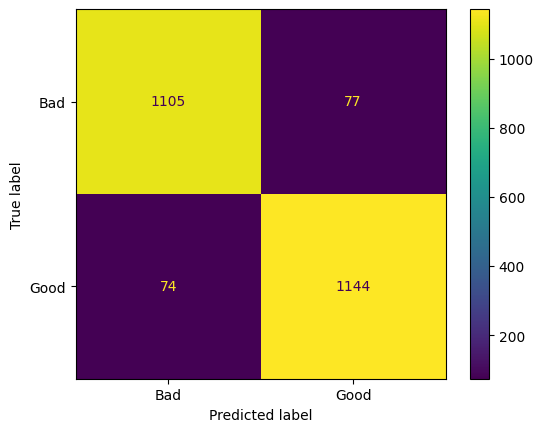

In [52]:
labels=['Bad', 'Good']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.94      0.93      0.94      1182
        Good       0.94      0.94      0.94      1218

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



[Text(0.7071725078351012, 0.9705882352941176, 'Sweetness <= 0.501\nentropy = 1.0\nsamples = 5600\nvalue = [2812, 2788]\nclass = Bad'),
 Text(0.4957095286885246, 0.9117647058823529, 'HarvestTime <= 0.588\nentropy = 0.967\nsamples = 4372\nvalue = [2651, 1721]\nclass = Bad'),
 Text(0.32985022902603667, 0.8529411764705882, 'Ripeness <= 0.56\nentropy = 0.814\nsamples = 3144\nvalue = [2353, 791]\nclass = Bad'),
 Text(0.16568225650916105, 0.7941176470588235, 'Size <= 0.586\nentropy = 0.365\nsamples = 1548\nvalue = [1440, 108]\nclass = Bad'),
 Text(0.125, 0.7352941176470589, 'Weight <= 0.686\nentropy = 0.272\nsamples = 1417\nvalue = [1351, 66]\nclass = Bad'),
 Text(0.08220829315332691, 0.6764705882352942, 'HarvestTime <= 0.511\nentropy = 0.181\nsamples = 1283\nvalue = [1248, 35]\nclass = Bad'),
 Text(0.048698167791706846, 0.6176470588235294, 'Sweetness <= 0.456\nentropy = 0.113\nsamples = 1057\nvalue = [1041, 16]\nclass = Bad'),
 Text(0.020250723240115717, 0.5588235294117647, 'Weight <= 0.072\

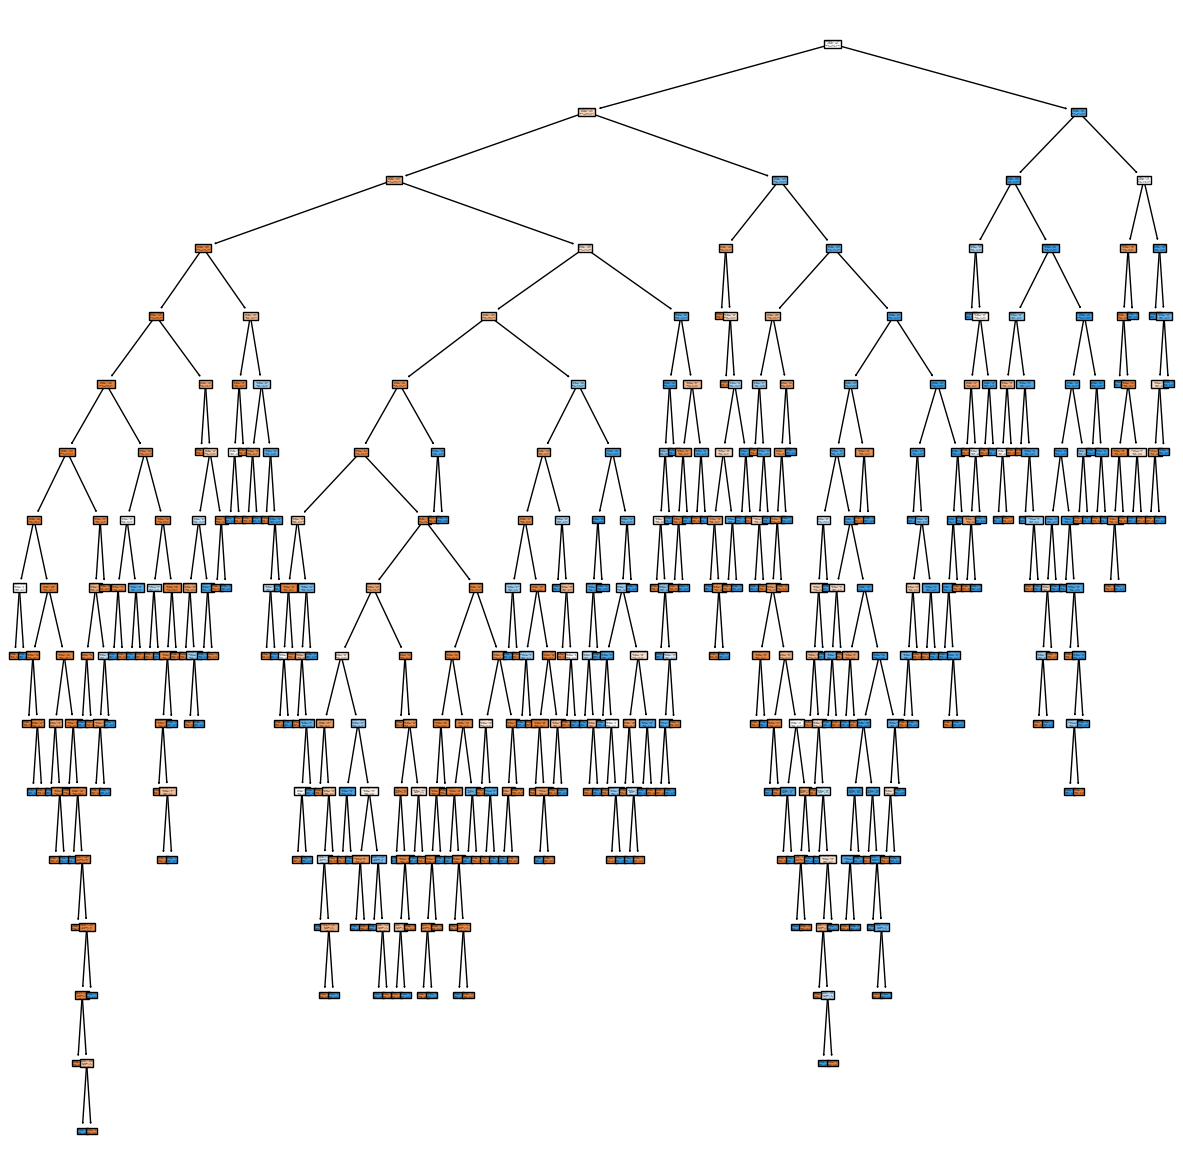

In [54]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['Size','Weight','Sweetness','Softness','HarvestTime','Ripeness','Acidity'],class_names=['Bad','Good'],filled=True)